<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
                      coefficients
Avg. Session Length      25.981550
Time on App              38.590159
Time on Website           0.190405
Length of Membership     61.279097
[456.44186104 402.72005312 409.2531539  591.4310343  590.01437275
 548.82396607 577.59737969 715.44428115 473.7893446  545.9211364
 337.8580314  500.38506697 552.93478041 409.6038964  765.52590754
 545.83973731 693.25969124 507.32416226 573.10533175 573.2076631
 397.44989709 555.0985107  458.19868141 482.66899

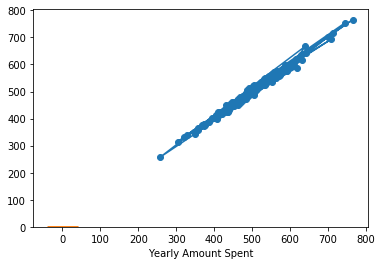

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#get data
data = pd.read_csv('F:\\Data Science - rahul notes\Machine Learning algorithms\Ecommerce Customers.csv')
data.head()
data.describe()
data.info()
data.corr()

#Training and testing data
data.columns
X = data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
Y = data['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.3, random_state = 101)

#Traing the model
#creating an instance of LinearRegression( model named lm)
lm = LinearRegression()
#train/fit lm on the training data
lm.fit(X_train, y_train)

#coefficients of the model
coeff_data = pd.DataFrame(lm.coef_,X.columns, columns = ['coefficients'])
print(coeff_data)
incercept = lm.intercept_
# predicting test data
predictions = lm.predict(X_test)
print(predictions)

plt.scatter(y_test,predictions)
plt.plot(y_test, predictions)

# Evaluating the model
#calculating the mean absolute error, mean squared error, squared mean squared error
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#Residuals
#Ploting a histogram of the \ 
#residuals and making sure it looks normally distributed.
sns.distplot((y_test-predictions), bins = 50)

